In [1]:
#importlibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
#checking available files 
!ls

Phase 2 Project.ipynb
README.md
data


In [3]:
#opening the king county housing data 
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#getting data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

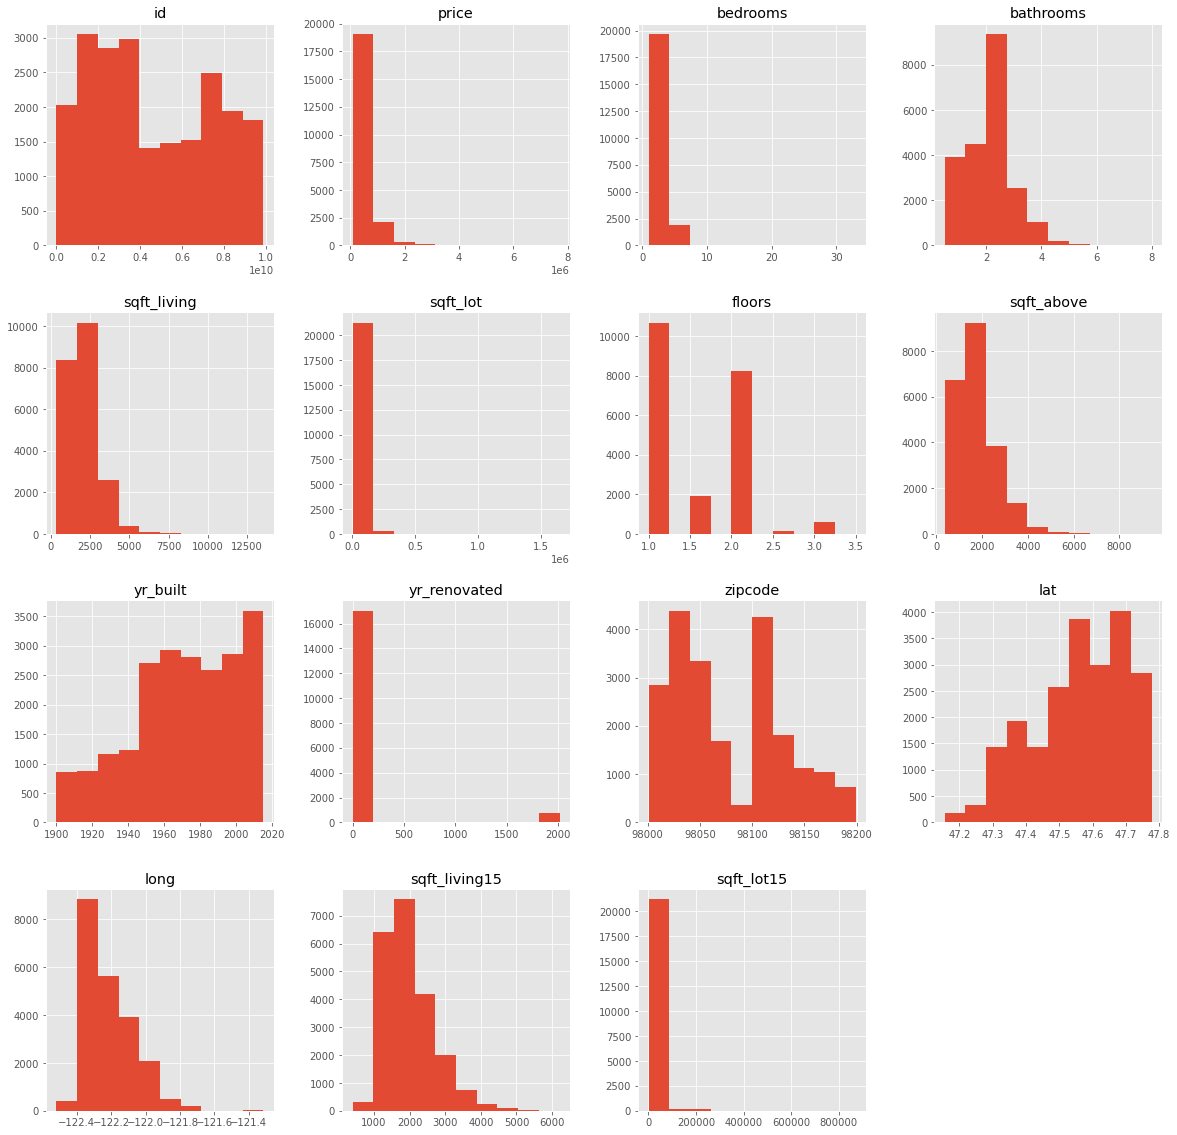

In [5]:
data.hist(figsize=(20,20));

In [6]:
#checking null values
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#dropping 'yr_renovated' and 'waterfront' because they are missing
#more than 10% of their entries 
#dropping 'id' because its a unique identifier
#dropping 'date' because its not needed for this analysis
#dropping null values remaining 

data.drop('yr_renovated', axis=1, inplace=True)
data.drop('waterfront', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data = data.dropna()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


King County Hardiness Zones 

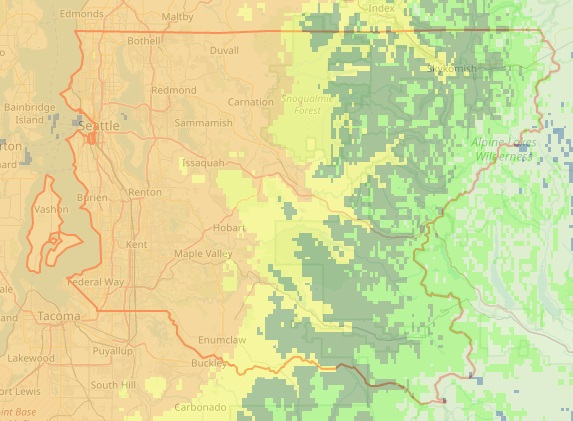

In [9]:
#takng the absolute value of the longitude 
data['long'] = data['long'].abs()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,122.045,1800,7503


In [10]:
#creating zones based on hardiness 
# 8b = 4, 8a = 3, 7b = 2, 7a = 1
x = data['long'].tolist()
res = ["4" if i > 122.2 
       else "3" if i > 122.0 
       else "2" if i > 121.6
       else "1"for i in x]
data['zone'] = res
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,zone
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,122.257,1340,5650,4
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,122.319,1690,7639,4
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,122.233,2720,8062,4
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,122.393,1360,5000,4
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,122.045,1800,7503,3


def group_zone(long_list):
    if long_list[0] < -122.2:
        return '8b'
    elif long_list[0] < -122.0 and long_list[0] > -121.6:
        return '8a'
    elif long_list[0] < -121.6 and long_list[0] > -121.4:
        return '7b'
    else: 
        return '7a'
    
data.apply(lambda row: group_zone(row), axis=1)
data['zone'] = data.apply(lambda row: group_zone(row), axis=1)
data.head()

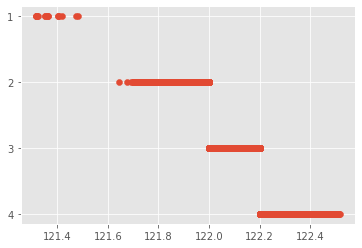

In [11]:
#using a scatter plot to visually assure the zones are correct
X = data['long']
Y = data['zone']
plt.scatter(X,Y)

In [12]:
#converting data type to integer
data['zone'] = data['zone'].astype(str).astype(int)

In [13]:
#limiting the dataset to show homes only in zone 4
data = data[data['zone'] > 3]
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,zone
count,1.221900e+04,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.0
mean,5.400324e+05,3.257550,1.969351,1899.905311,8692.686063,1.445249,1556.620509,1960.372944,98104.533841,47.577112,122.314984,1791.730993,7942.623455,4.0
std,4.118560e+05,0.999856,0.796732,870.018663,17971.342268,0.563265,706.292556,31.140452,54.793028,0.137439,0.057081,586.524152,11978.930863,0.0
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,1900.000000,98001.000000,47.257400,122.201000,460.000000,651.000000,4.0
25%,3.099500e+05,3.000000,1.000000,1290.000000,4400.000000,1.000000,1080.000000,1940.000000,98055.000000,47.499200,122.279000,1385.500000,4560.000000,4.0
50%,4.350000e+05,3.000000,2.000000,1730.000000,6604.000000,1.000000,1380.000000,1957.000000,98116.000000,47.602800,122.317000,1660.000000,6600.000000,4.0
75%,6.250000e+05,4.000000,2.500000,2310.000000,9085.000000,2.000000,1820.000000,1986.000000,98136.000000,47.687200,122.361000,2060.000000,8760.000000,4.0
max,7.700000e+06,33.000000,8.000000,12050.000000,843309.000000,3.500000,8860.000000,2015.000000,98199.000000,47.777600,122.519000,5500.000000,380279.000000,4.0


In [14]:
#dropping lat, long, and zipcode because they are similar to zone
data.drop('lat', axis=1, inplace=True)
data.drop('long', axis=1, inplace=True)
data.drop('zipcode', axis=1, inplace=True)

In [15]:
#engineering columns that contain size of lawn 
data['sqft_lawn'] = data['sqft_lot'].subtract(data['sqft_living'])
data['sqft_lawn15'] = data['sqft_lot15'].subtract(data['sqft_living15'])
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,zone,sqft_lawn,sqft_lawn15
count,1.221900e+04,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.0,12219.000000,12219.000000
mean,5.400324e+05,3.257550,1.969351,1899.905311,8692.686063,1.445249,1556.620509,1960.372944,1791.730993,7942.623455,4.0,6792.780751,6150.892463
std,4.118560e+05,0.999856,0.796732,870.018663,17971.342268,0.563265,706.292556,31.140452,586.524152,11978.930863,0.0,17866.404299,11897.923209
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,1900.000000,460.000000,651.000000,4.0,-1900.000000,-1363.000000
25%,3.099500e+05,3.000000,1.000000,1290.000000,4400.000000,1.000000,1080.000000,1940.000000,1385.500000,4560.000000,4.0,2496.000000,2792.500000
50%,4.350000e+05,3.000000,2.000000,1730.000000,6604.000000,1.000000,1380.000000,1957.000000,1660.000000,6600.000000,4.0,4819.000000,4920.000000
75%,6.250000e+05,4.000000,2.500000,2310.000000,9085.000000,2.000000,1820.000000,1986.000000,2060.000000,8760.000000,4.0,7230.000000,7020.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,843309.000000,3.500000,8860.000000,2015.000000,5500.000000,380279.000000,4.0,839659.000000,378429.000000


In [16]:
#engineering columns that show lawn as percentage of the lot 
data['sqft_lawn_prct'] = data['sqft_lawn']/data['sqft_lot']
data['sqft_lawn_prct15'] = data['sqft_lawn15']/data['sqft_lot15']
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,zone,sqft_lawn,sqft_lawn15,sqft_lawn_prct,sqft_lawn_prct15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,1340,5650,4,4470,4310,0.791150,0.762832
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1690,7639,4,4672,5949,0.645126,0.778767
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,2720,8062,4,9230,5342,0.923000,0.662615
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,1360,5000,4,3040,3640,0.608000,0.728000
6,257500.0,3,2.25,1715,6819,2.0,NONE,Average,7 Average,1715,?,1995,2238,6819,4,5104,4581,0.748497,0.671799


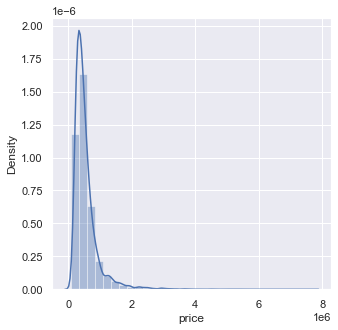

In [17]:
#checking for normal distribution on target variable 'price'
#"Given from the histogram: The saleprice has appreciable positive skewness, deviates from the normal distribution and shows peakedness. Let's take a look at the skewness and kurtosis in numbers:
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(data['price'], bins=30)
plt.show()

In [18]:
#This is quite significant. At the data standardisation section, we will fix this.
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

Skewness: 4.186363
Kurtosis: 34.051400


In [ ]:
#make scatterplot of sqft_living and similar against price 

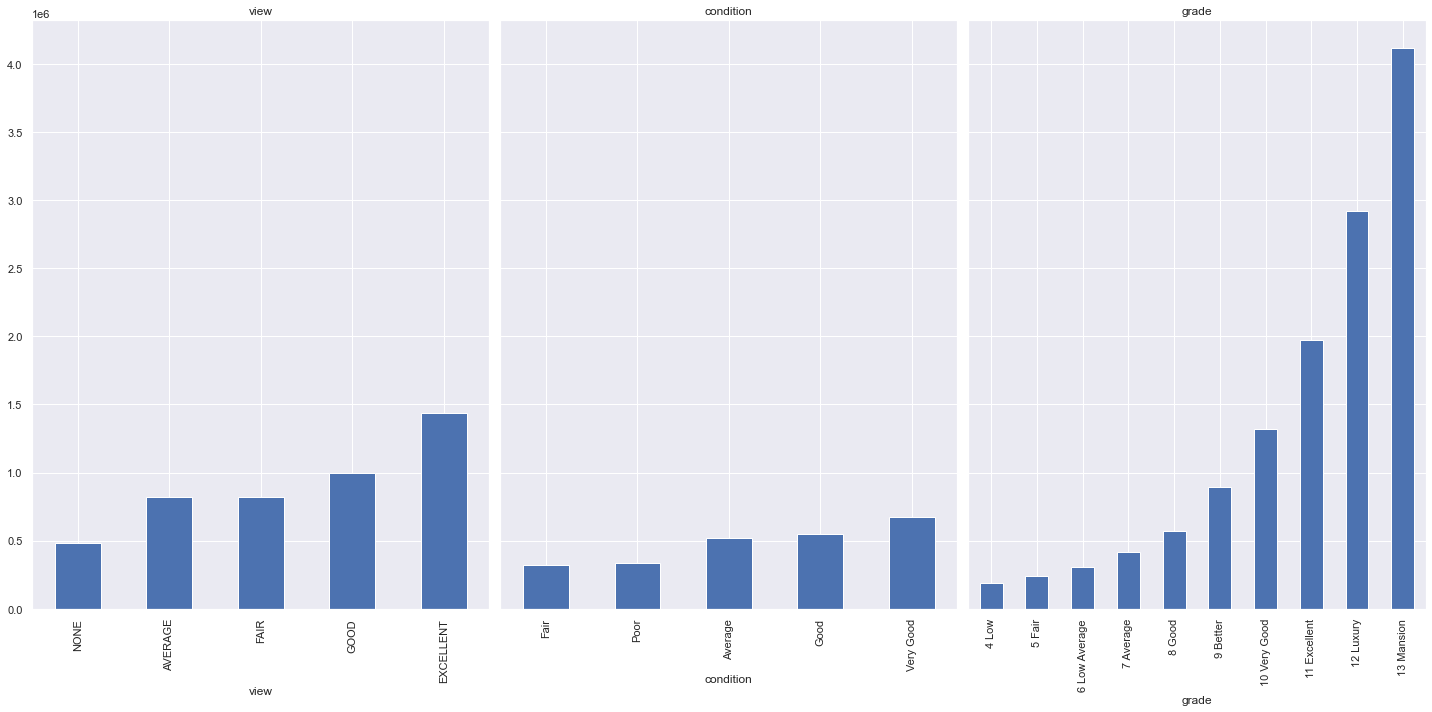

In [19]:
#plotting categorical variables 
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10), sharey=True)

categoricals = ['view', 'condition', 'grade']

for col, ax in zip(categoricals, axes.flatten()):
    (data.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [20]:
#dummy enconding categorical variables 

dummies = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)

data = data.drop(categoricals, axis=1)

data = pd.concat([data, dummies], axis=1)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,1340,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1690,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,2720,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,1360,...,1,0,0,0,0,0,0,1,0,0
6,257500.0,3,2.25,1715,6819,2.0,1715,?,1995,2238,...,0,0,0,0,0,0,0,1,0,0


In [21]:
#renaming grade columns to contain no spaces 
data.rename(columns={'grade_11 Excellent': 'grade_Excellent', 'grade_12 Luxury': 'grade_Luxury', 'grade_13 Mansion': 'grade_Mansion', 'grade_4 Low': 'grade_Low', 'grade_5 Fair': 'grade_Fair','grade_6 Low Average': 'grade_Low_Average','grade_7 Average': 'grade_Average','grade_8 Good': 'grade_Good','grade_9 Better': 'grade_Better'}, inplace=True)

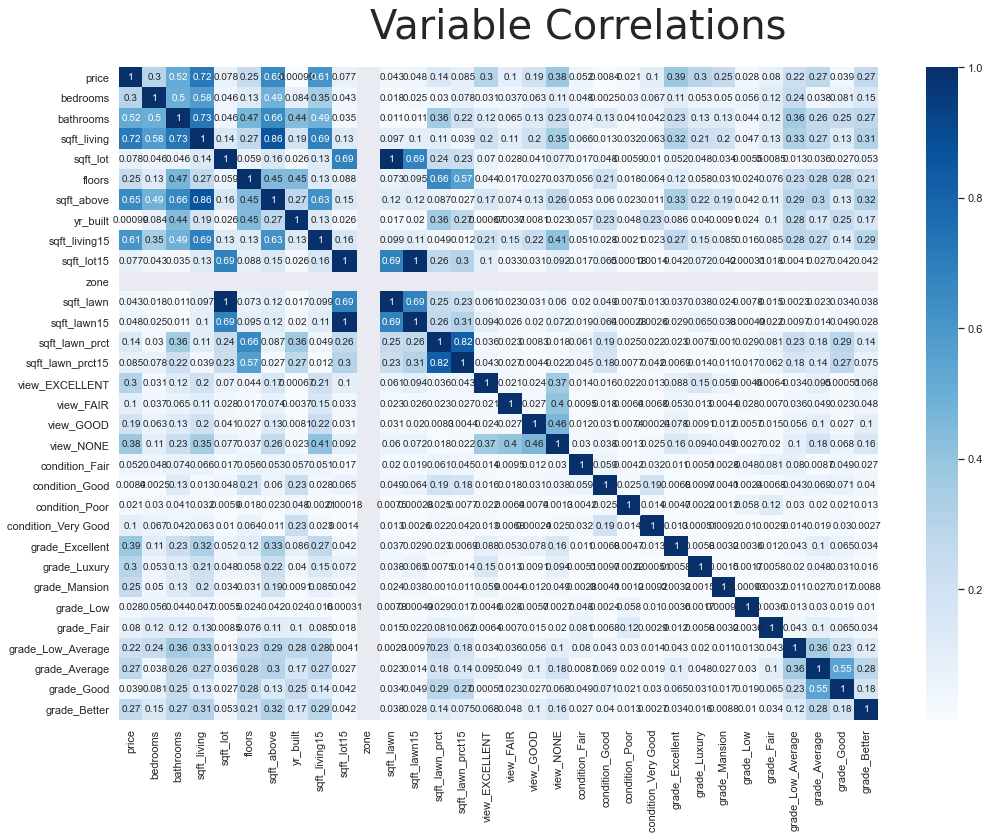

In [22]:
#checking variable correlations 
corr = data.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=40, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

In [23]:
#creating list of features and correlations 
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [24]:
#checking for multicollinearity
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .50 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

In [25]:
#printing variable
print('Correlations with Price')
display(corr_price_df)
print('Multicollinear Features')
display(MC_df)

Correlations with Price


,Correlations,Features
1,0.720040,sqft_living
2,0.653637,sqft_above
3,0.612030,sqft_living15
0,0.517365,bathrooms
6,0.385658,grade_Excellent
5,0.381624,view_NONE
4,0.302921,view_EXCELLENT
7,0.300534,grade_Luxury


Multicollinear Features


,Correlations,Features
16,0.998838,"[sqft_lot, sqft_lawn]"
30,0.998838,"[sqft_lawn, sqft_lot]"
34,0.998816,"[sqft_lawn15, sqft_lot15]"
29,0.998816,"[sqft_lot15, sqft_lawn15]"
22,0.859438,"[sqft_above, sqft_living]"
13,0.859438,"[sqft_living, sqft_above]"
39,0.817622,"[sqft_lawn_prct15, sqft_lawn_prct]"
37,0.817622,"[sqft_lawn_prct, sqft_lawn_prct15]"
12,0.732797,"[sqft_living, bathrooms]"
8,0.732797,"[bathrooms, sqft_living]"


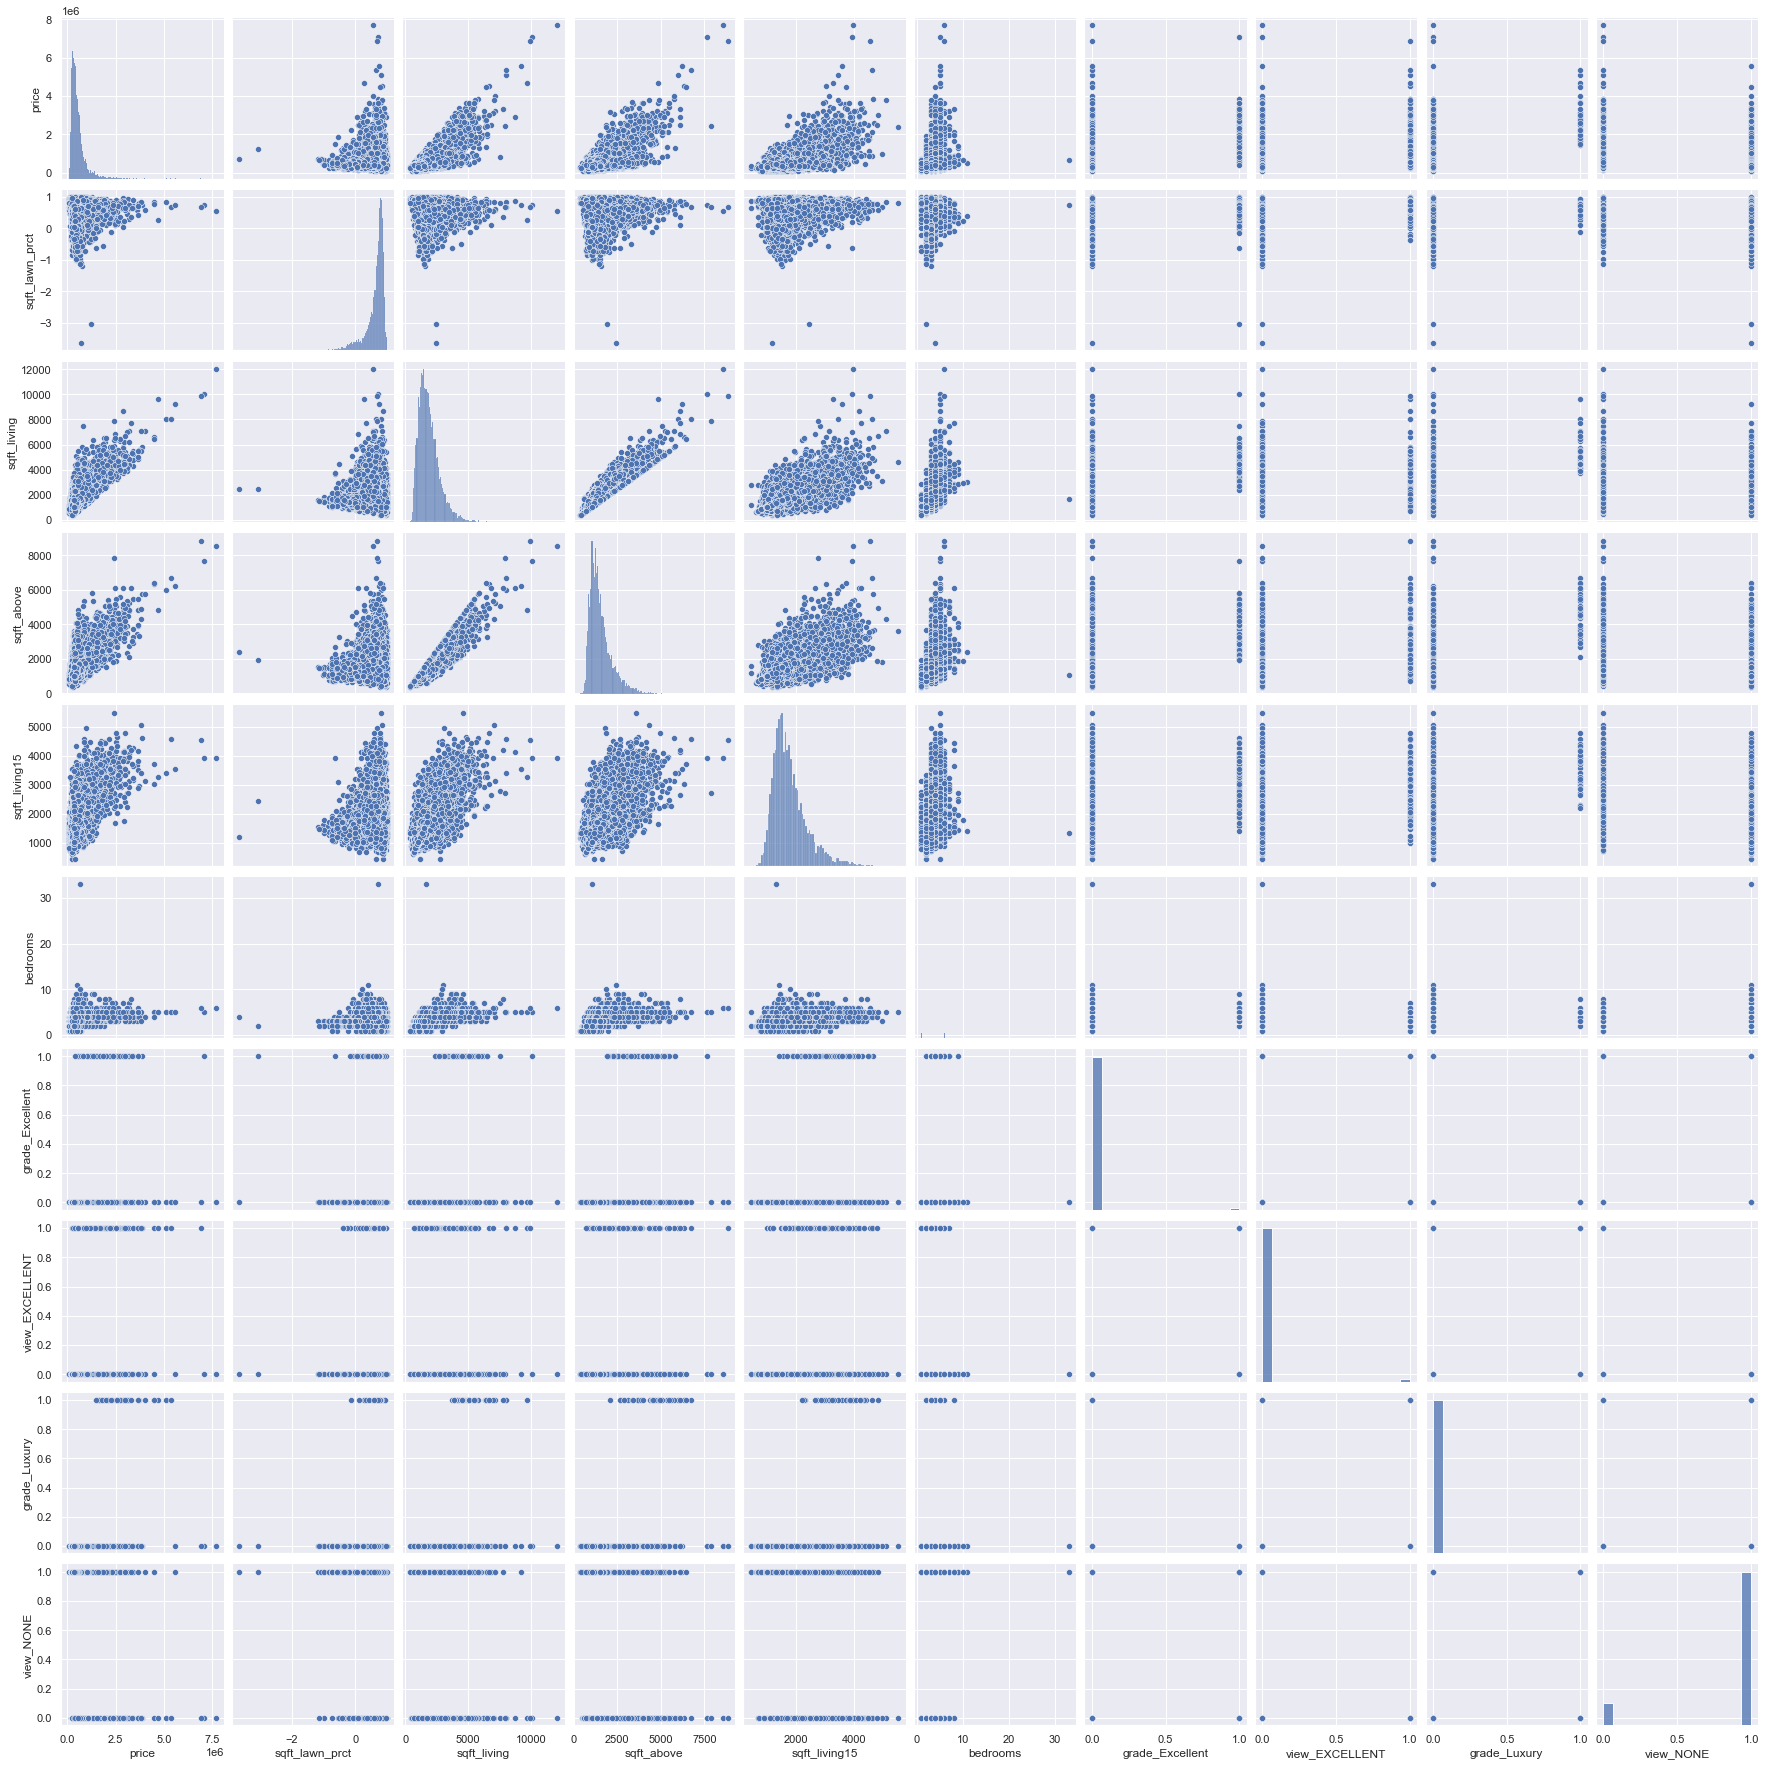

In [53]:
#"These overall scatterplots confirm the findings of the heatmap. There is myriad of linear correlation between sqft_living, sqft_above, bathrooms and grade. This yields an opportunity for to combine features. Moreover, what we learned that the above mentioned features have the biggest impact on sale price. One would also expect location to play a role, but as they are in latitude/longitude coordinates, it requires advanced data manipulation to take it into account. Finally, due to many linear relationships we can apply regression models"
sns.set()
cols = ['price', 'sqft_lawn_prct','sqft_living', 'sqft_above', 'sqft_living15', 'bedrooms', 'grade_Excellent', 'view_EXCELLENT', 'grade_Luxury', 'view_NONE']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [54]:
#standardizing data to mitigate skewdness and kurtosis
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(data['price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.12187601]
 [-1.11459161]
 [-1.11216348]
 [-1.11094942]
 [-1.10973535]
 [-1.10730722]
 [-1.10487908]
 [-1.10487908]
 [-1.10123688]
 [-1.09516655]]

outer range (high) of the distribution:
[[ 8.40125992]
 [ 9.59104488]
 [ 9.61532621]
 [10.02810874]
 [11.09648707]
 [11.67923889]
 [12.21342806]
 [15.41856305]
 [15.83134558]
 [17.38535043]]


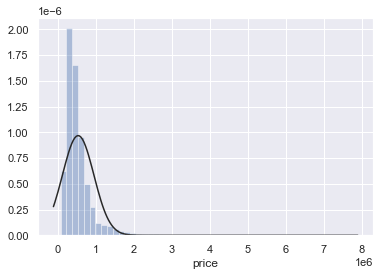

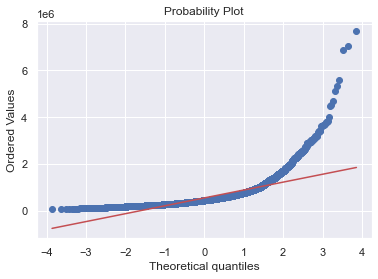

In [57]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(data['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

In [59]:
#"We'll fix it by taking the log and fitting the plot to a normal distribution curve"
#applying log transformation
data['price'] = np.log(data['price'])

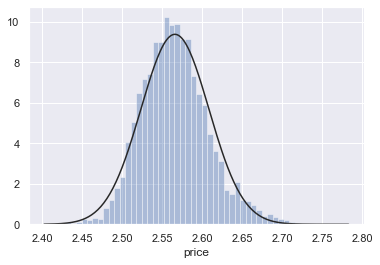

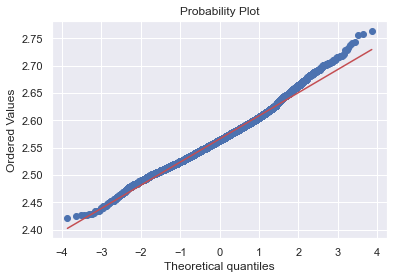

In [61]:
#transformed histogram and normal probability plot
sns.distplot(data['price'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

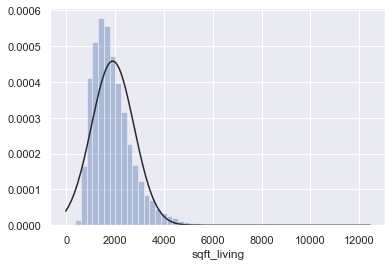

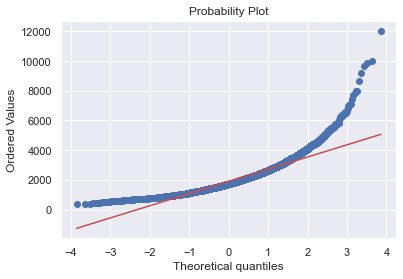

In [62]:
#histogram and normal probability plot
sns.distplot(data['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_living'], plot=plt)

In [64]:
#data transformation
data['sqft_living'] = np.log(data['sqft_living'])

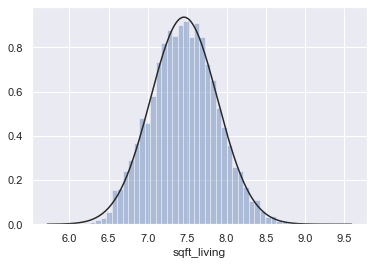

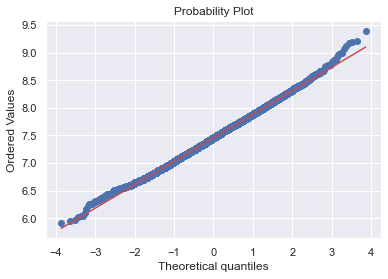

In [65]:
#transformed histogram and normal probability plot
sns.distplot(data['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['sqft_living'], plot=plt)

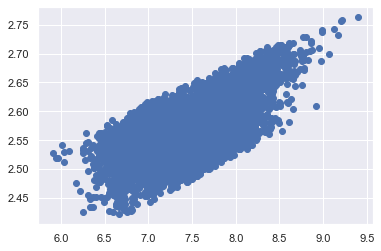

In [67]:
#scatter plot
plt.scatter(data['sqft_living'], data['price']);

In [68]:
#creating model with variables most highly correlated with price 
#including sqft_lawn because it is of concern to our stakeholder
#replacing bathroom with bedroom because better p-value
Model_1 = smf.ols(formula='price ~ sqft_lawn_prct + sqft_living + sqft_above + sqft_living15 + bathrooms + grade_Excellent + view_EXCELLENT + grade_Luxury + view_NONE', data=data).fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1508.
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:27:11   Log-Likelihood:                 25805.
No. Observations:               12219   AIC:                        -5.159e+04
Df Residuals:                   12209   BIC:                        -5.152e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.3187      0.008    278.485      0.000       2.302       2.335
sqft_lawn_prct     -0.0316      0.001    -32.045      0.000      -0.034      -0.030
sqft_living         0.0325      0.001     25.672      0.000       0.030       0.035
sqft_above           5e-06   6.85e-07      7.301      0.000    3.66e-06    6.34e-06
sqft_living15    1.834e-05   6.64e-07     27.632      0.000     1.7e-05    1.96e-05
bathrooms          -0.0019      0.001     -3.493      0.000      -0.003      -0.001
grade_Excellent     0.0278      0.003     10.668      0.000       0.023       0.033
view_EXCELLENT      0.0214      0.002     10.159      0.000       0.017       0.026
grade_Luxury        0.0350      0.005      6.592      0.000       0.025       0.045
view_NONE          -0.0150      0.001    -16.227      0.000      -0.017      -0.013
==============================================================================
Omnibus:                      223.267   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.611
Skew:                          -0.165   Prob(JB):                     1.62e-34
Kurtosis:                       2.557   Cond. No.                     8.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#replacing bathroom with bedroom because better p-value
Model_2 = smf.ols(formula='price ~ sqft_lawn_prct + sqft_living + sqft_above + sqft_living15 + bedrooms + grade_Excellent + view_EXCELLENT + grade_Luxury + view_NONE', data=data).fit()
Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2310.
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:14:18   Log-Likelihood:            -1.6923e+05
No. Observations:               12219   AIC:                         3.385e+05
Df Residuals:                   12209   BIC:                         3.386e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.136e+05   1.41e+04      8.082      0.000    8.61e+04    1.41e+05
sqft_lawn_prct  -1.379e+05   7714.428    -17.880      0.000   -1.53e+05   -1.23e+05
sqft_living       217.7145      6.178     35.239      0.000     205.604     229.825
sqft_above         40.9650      6.412      6.389      0.000      28.397      53.533
sqft_living15     124.6543      5.672     21.978      0.000     113.537     135.772
bedrooms        -4.223e+04   2855.577    -14.787      0.000   -4.78e+04   -3.66e+04
grade_Excellent  5.873e+05   2.23e+04     26.322      0.000    5.44e+05    6.31e+05
view_EXCELLENT    3.36e+05    1.8e+04     18.623      0.000    3.01e+05    3.71e+05
grade_Luxury      1.14e+06   4.56e+04     25.033      0.000    1.05e+06    1.23e+06
view_NONE       -7.581e+04   8016.609     -9.457      0.000   -9.15e+04   -6.01e+04
==============================================================================
Omnibus:                     6408.781   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           259118.043
Skew:                           1.850   Prob(JB):                         0.00
Kurtosis:                      25.254   Cond. No.                     6.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#check for linearity 
#use seaborn pair plot (all variables)
#make scatterplot against price 
#two recommendations using coefficient 
#figure out what makes grade excellent and talk about it to the stakeholder 
#iterate more models 

In [69]:
train, test = train_test_split(data)

In [70]:
train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,condition_Very Good,grade_Excellent,grade_Luxury,grade_Mansion,grade_Low,grade_Fair,grade_Low_Average,grade_Average,grade_Good,grade_Better
16802,2.535922,3,2.00,7.512071,10873,1.0,1830,0.0,1989,2490,...,0,0,0,0,0,0,0,0,1,0
9848,2.566256,5,2.50,7.549609,9460,1.0,1190,710.0,1969,1940,...,0,0,0,0,0,0,0,1,0,0
16209,2.528427,5,2.25,7.762171,13000,1.0,2350,0.0,1961,1570,...,0,0,0,0,0,0,0,1,0,0
7542,2.509675,3,1.00,6.877296,7742,1.0,970,0.0,1967,970,...,0,0,0,0,0,0,1,0,0,0
2211,2.556778,4,1.00,7.265430,6240,1.5,1430,0.0,1953,1410,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2.560758,4,1.50,7.673223,23568,1.0,2150,0.0,1950,2150,...,0,0,0,0,0,0,0,1,0,0
1218,2.570401,4,3.50,8.205218,14401,2.0,2660,1000.0,1994,2780,...,0,0,0,0,0,0,0,0,0,0
15070,2.551105,3,2.25,7.377759,7620,1.0,1280,320.0,1987,1600,...,0,0,0,0,0,0,0,1,0,0
10957,2.582202,4,2.50,7.610853,4350,2.0,1730,290.0,1943,1620,...,1,0,0,0,0,0,0,0,0,1


In [71]:
test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,condition_Very Good,grade_Excellent,grade_Luxury,grade_Mansion,grade_Low,grade_Fair,grade_Low_Average,grade_Average,grade_Good,grade_Better
3017,2.502748,2,1.00,6.507278,7844,1.0,670,?,1942,740,...,0,0,0,0,0,0,1,0,0,0
15090,2.553182,3,1.00,7.106606,3000,1.5,1220,0.0,1901,1350,...,0,0,0,0,0,0,1,0,0,0
1250,2.556973,5,2.00,7.870930,7030,1.0,1420,1200.0,1965,1360,...,0,0,0,0,0,0,0,0,1,0
10718,2.566256,2,2.75,7.940940,11205,1.0,1510,1300.0,1968,2520,...,0,0,0,0,0,0,0,1,0,0
12672,2.537844,2,1.00,6.768493,7227,1.0,870,0.0,1948,1250,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13759,2.531646,2,1.00,6.917706,7740,1.0,890,120.0,1924,1030,...,0,0,0,0,0,0,1,0,0,0
4632,2.610422,4,1.00,7.673223,3588,2.0,1850,300.0,1926,1950,...,0,0,0,0,0,0,0,0,1,0
4513,2.548965,3,2.00,7.565275,15540,1.0,1260,670.0,1958,1900,...,0,0,0,0,0,0,0,0,1,0
15269,2.589049,5,1.75,7.705262,6000,1.5,1420,800.0,1923,1550,...,0,0,0,0,0,0,0,1,0,0


In [72]:
y = data[['price']]
X = data[['sqft_lawn_prct','sqft_living', 'sqft_above', 'sqft_living15', 'bedrooms', 'grade_Excellent', 'view_EXCELLENT', 'grade_Luxury', 'view_NONE']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [73]:
X_train

,sqft_lawn_prct,sqft_living,sqft_above,sqft_living15,bedrooms,grade_Excellent,view_EXCELLENT,grade_Luxury,view_NONE
13319,0.353147,7.522941,1210,1660,3,0,0,0,1
8633,0.842105,7.138867,1260,1760,3,0,0,0,1
11592,0.644612,7.539027,1250,2030,3,0,0,0,1
5059,0.313984,6.946976,1040,1560,2,0,0,0,1
11270,0.861432,6.579251,720,1580,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
20295,-0.854545,7.333023,1530,1580,3,0,0,0,1
19258,0.693840,7.414573,830,1100,1,0,0,0,1
4223,0.342995,7.215240,1360,1920,2,0,0,0,1
8176,0.820988,7.279319,1450,1450,3,0,0,0,1


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [75]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Instantiate a custom transformer for log transformation 
log_transformer = FunctionTransformer(np.log, validate=True)

# Columns to be log transformed 
log_columns = ['sqft_above', 'sqft_living', 'sqft_living15']

# New names for columns after transformation
new_log_columns = ['log_sqft_above', 'log_sqft_living', 'sqft_living15']

# Log transform the training columns and convert them into a DataFrame 
X_train_log = pd.DataFrame(log_transformer.fit_transform(X_train[log_columns]), 
                           columns=new_log_columns, index=X_train.index)

# Replace training columns with transformed versions
X_train = pd.concat([X_train.drop(log_columns, axis=1), X_train_log], axis=1)
X_train

,sqft_lawn_prct,bedrooms,grade_Excellent,view_EXCELLENT,grade_Luxury,view_NONE,log_sqft_above,log_sqft_living,sqft_living15
1502,0.857567,5,0,0,0,0,8.266164,2.112171,8.058327
3770,0.803279,3,0,0,0,1,7.272398,1.984086,7.056175
19908,-0.151226,3,0,0,0,1,7.229839,2.005860,7.432484
13513,0.848878,3,0,0,0,1,7.200425,1.974140,7.396335
1391,0.862069,2,0,0,0,1,6.779922,1.913966,7.200425
...,...,...,...,...,...,...,...,...,...
21079,0.685167,4,0,0,0,1,7.543803,2.020726,7.595890
9167,-0.009989,4,0,0,0,0,7.580700,2.104102,7.570443
9517,0.862058,2,0,0,0,1,6.721426,1.905300,7.200425
1615,0.244713,3,0,0,0,1,6.721426,1.964437,7.326466


In [76]:
# Log transform the test columns and convert them into a DataFrame 
X_test_log = pd.DataFrame(log_transformer.transform(X_test[log_columns]), 
                          columns=new_log_columns, index=X_test.index)

# Replace testing columns with transformed versions
X_test = pd.concat([X_test.drop(log_columns, axis=1), X_test_log], axis=1)
X_test

,sqft_lawn_prct,bedrooms,grade_Excellent,view_EXCELLENT,grade_Luxury,view_NONE,log_sqft_above,log_sqft_living,sqft_living15
17563,0.454545,3,0,0,0,1,7.432484,2.014308,7.358831
20549,0.132075,3,0,0,0,1,7.056175,1.978217,7.229839
2972,0.796525,4,0,0,1,1,8.488794,2.138747,8.183118
17107,0.559548,3,0,0,0,1,7.326466,1.991493,7.495542
20838,-0.133257,2,0,0,0,1,7.484369,2.027607,7.578145
...,...,...,...,...,...,...,...,...,...
18274,0.940287,4,0,0,0,1,8.314587,2.118011,7.795647
14937,-0.177977,4,0,0,0,1,7.244228,2.017236,7.517521
18713,0.887179,3,0,0,0,1,7.003065,1.946348,7.081709
5474,0.823333,2,0,0,0,1,6.966024,1.941045,6.845880


In [77]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Categorical columns
cat_columns = ['bedrooms']

# Fit encoder on training set
ohe.fit(X_train[cat_columns])

# Get new column names
new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# Transform training set
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train[cat_columns]),
                           columns=new_cat_columns, index=X_train.index)

# Replace training columns with transformed versions
X_train = pd.concat([X_train.drop(cat_columns, axis=1), X_train_ohe], axis=1)
X_train

,sqft_lawn_prct,grade_Excellent,view_EXCELLENT,grade_Luxury,view_NONE,log_sqft_above,log_sqft_living,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_11,bedrooms_33
1502,0.857567,0,0,0,0,8.266164,2.112171,8.058327,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3770,0.803279,0,0,0,1,7.272398,1.984086,7.056175,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19908,-0.151226,0,0,0,1,7.229839,2.005860,7.432484,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13513,0.848878,0,0,0,1,7.200425,1.974140,7.396335,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1391,0.862069,0,0,0,1,6.779922,1.913966,7.200425,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21079,0.685167,0,0,0,1,7.543803,2.020726,7.595890,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9167,-0.009989,0,0,0,0,7.580700,2.104102,7.570443,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9517,0.862058,0,0,0,1,6.721426,1.905300,7.200425,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1615,0.244713,0,0,0,1,6.721426,1.964437,7.326466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# Transform testing set
X_test_ohe = pd.DataFrame(ohe.transform(X_test[cat_columns]),
                           columns=new_cat_columns, index=X_test.index)

# Replace testing columns with transformed versions
X_test = pd.concat([X_test.drop(cat_columns, axis=1), X_test_ohe], axis=1)
X_test

,sqft_lawn_prct,grade_Excellent,view_EXCELLENT,grade_Luxury,view_NONE,log_sqft_above,log_sqft_living,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_11,bedrooms_33
17563,0.454545,0,0,0,1,7.432484,2.014308,7.358831,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20549,0.132075,0,0,0,1,7.056175,1.978217,7.229839,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2972,0.796525,0,0,1,1,8.488794,2.138747,8.183118,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17107,0.559548,0,0,0,1,7.326466,1.991493,7.495542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20838,-0.133257,0,0,0,1,7.484369,2.027607,7.578145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18274,0.940287,0,0,0,1,8.314587,2.118011,7.795647,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14937,-0.177977,0,0,0,1,7.244228,2.017236,7.517521,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18713,0.887179,0,0,0,1,7.003065,1.946348,7.081709,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5474,0.823333,0,0,0,1,6.966024,1.941045,6.845880,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [80]:
#returning the RMSE by setting squared=False
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train, squared=False)
test_mse = mean_squared_error(y_test, y_hat_test, squared=False)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.029297491949376035
Test Mean Squared Error: 0.02937975630561801


References 
https://github.com/AvonleaFisher/Predicting-King-County-House-Prices-with-Multiple-Regression-Analysis/blob/master/Mod2_FinalProject_Notebook%20(1).ipynb
https://www.kaggle.com/code/henriqueyamahata/boston-housing-with-linear-regression
https://www.kaggle.com/code/madislemsalu/predicting-housing-prices-in-king-county-usa